# WeatherPy
----

#### Note
* As stated on Homework instructions, we can confirm that as we go closer to the equator temperature is higher.
* There is no relation between latitude and both cloudiness and humidity.
* There appears to be more data on cities on the northern hemisphere, this could be due to the fact that most 1st world countries are on the nothern hemisphere.

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key_2

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Resources/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
#Testing the API in order to confirm location of information required
base_url = "https://api.openweathermap.org/data/2.5/weather?"
test_url= base_url + "appid=" + weather_api_key_2 + "&q=london&units=imperial"
response= requests.get(test_url).json()
print(json.dumps(response, indent=4, sort_keys=True))
        

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 51.51,
        "lon": -0.13
    },
    "dt": 1596146947,
    "id": 2643743,
    "main": {
        "feels_like": 68.09,
        "humidity": 68,
        "pressure": 1016,
        "temp": 69.8,
        "temp_max": 73,
        "temp_min": 66
    },
    "name": "London",
    "sys": {
        "country": "GB",
        "id": 1414,
        "sunrise": 1596082902,
        "sunset": 1596138719,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 90,
        "speed": 8.05
    }
}


In [10]:
#Have to have lists in order to save information
lat= []
long=[]
temp=[]
temp_max= []
humidity =[]
cloudiness= []
wind_speed=[]
country=[]
count=0
set=0

# use iterrows to iterate through pandas dataframe, adding NaN append in order to have same length array for DataFrame

for city in cities:

    query_url= base_url + "appid=" + weather_api_key_2 + "&q= "+ city + "&units=imperial"

    
    print(f"Beginning Bat-Data Retrieval.")
    print("-----------------")
    count = count + 1
    if count == 51:
        count=1
        set = set +1
        time.sleep(5)
    print(f"Processing Record " + str(count) + " of Set " + str(set) + " | " + city)
    try:
        response = requests.get(query_url).json()
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        temp.append(response["main"]["temp"])
        temp_max.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
    except KeyError:
        print("City not found. Searching for next city...")
        lat.append(np.nan)
        long.append(np.nan)
        temp.append(np.nan)
        temp_max.append(np.nan)
        humidity.append(np.nan)
        cloudiness.append(np.nan)
        wind_speed.append(np.nan)
        country.append(np.nan)
print("---------------------")
print("Bat-Data Retrieval Complete")
print("---------------------")
    

Beginning Bat-Data Retrieval.
-----------------
Processing Record 1 of Set 0 | sao joao da barra
Beginning Bat-Data Retrieval.
-----------------
Processing Record 2 of Set 0 | hermanus
Beginning Bat-Data Retrieval.
-----------------
Processing Record 3 of Set 0 | cape town
Beginning Bat-Data Retrieval.
-----------------
Processing Record 4 of Set 0 | nizhneyansk
City not found. Searching for next city...
Beginning Bat-Data Retrieval.
-----------------
Processing Record 5 of Set 0 | samusu
City not found. Searching for next city...
Beginning Bat-Data Retrieval.
-----------------
Processing Record 6 of Set 0 | kapaa
Beginning Bat-Data Retrieval.
-----------------
Processing Record 7 of Set 0 | mataura
City not found. Searching for next city...
Beginning Bat-Data Retrieval.
-----------------
Processing Record 8 of Set 0 | vaini
Beginning Bat-Data Retrieval.
-----------------
Processing Record 9 of Set 0 | port elizabeth
Beginning Bat-Data Retrieval.
-----------------
Processing Record 10 

Beginning Bat-Data Retrieval.
-----------------
Processing Record 36 of Set 1 | kawalu
Beginning Bat-Data Retrieval.
-----------------
Processing Record 37 of Set 1 | amapa
City not found. Searching for next city...
Beginning Bat-Data Retrieval.
-----------------
Processing Record 38 of Set 1 | broome
Beginning Bat-Data Retrieval.
-----------------
Processing Record 39 of Set 1 | salalah
Beginning Bat-Data Retrieval.
-----------------
Processing Record 40 of Set 1 | barentsburg
City not found. Searching for next city...
Beginning Bat-Data Retrieval.
-----------------
Processing Record 41 of Set 1 | vardo
Beginning Bat-Data Retrieval.
-----------------
Processing Record 42 of Set 1 | chake chake
Beginning Bat-Data Retrieval.
-----------------
Processing Record 43 of Set 1 | bilma
Beginning Bat-Data Retrieval.
-----------------
Processing Record 44 of Set 1 | deputatskiy
Beginning Bat-Data Retrieval.
-----------------
Processing Record 45 of Set 1 | warqla
City not found. Searching for n

Beginning Bat-Data Retrieval.
-----------------
Processing Record 23 of Set 3 | lagos
Beginning Bat-Data Retrieval.
-----------------
Processing Record 24 of Set 3 | chaohu
Beginning Bat-Data Retrieval.
-----------------
Processing Record 25 of Set 3 | yavatmal
Beginning Bat-Data Retrieval.
-----------------
Processing Record 26 of Set 3 | airai
City not found. Searching for next city...
Beginning Bat-Data Retrieval.
-----------------
Processing Record 27 of Set 3 | hobart
Beginning Bat-Data Retrieval.
-----------------
Processing Record 28 of Set 3 | luanda
Beginning Bat-Data Retrieval.
-----------------
Processing Record 29 of Set 3 | amderma
City not found. Searching for next city...
Beginning Bat-Data Retrieval.
-----------------
Processing Record 30 of Set 3 | tahta
Beginning Bat-Data Retrieval.
-----------------
Processing Record 31 of Set 3 | husavik
Beginning Bat-Data Retrieval.
-----------------
Processing Record 32 of Set 3 | bandarbeyla
Beginning Bat-Data Retrieval.
--------

Beginning Bat-Data Retrieval.
-----------------
Processing Record 9 of Set 5 | ayan
Beginning Bat-Data Retrieval.
-----------------
Processing Record 10 of Set 5 | alice springs
Beginning Bat-Data Retrieval.
-----------------
Processing Record 11 of Set 5 | los llanos de aridane
Beginning Bat-Data Retrieval.
-----------------
Processing Record 12 of Set 5 | pervomayskaya
Beginning Bat-Data Retrieval.
-----------------
Processing Record 13 of Set 5 | rawson
Beginning Bat-Data Retrieval.
-----------------
Processing Record 14 of Set 5 | nouakchott
Beginning Bat-Data Retrieval.
-----------------
Processing Record 15 of Set 5 | katsuura
Beginning Bat-Data Retrieval.
-----------------
Processing Record 16 of Set 5 | barroquinha
Beginning Bat-Data Retrieval.
-----------------
Processing Record 17 of Set 5 | kaura namoda
Beginning Bat-Data Retrieval.
-----------------
Processing Record 18 of Set 5 | westport
Beginning Bat-Data Retrieval.
-----------------
Processing Record 19 of Set 5 | honni

City not found. Searching for next city...
Beginning Bat-Data Retrieval.
-----------------
Processing Record 45 of Set 6 | santa elena
Beginning Bat-Data Retrieval.
-----------------
Processing Record 46 of Set 6 | annau
Beginning Bat-Data Retrieval.
-----------------
Processing Record 47 of Set 6 | nanzhou
Beginning Bat-Data Retrieval.
-----------------
Processing Record 48 of Set 6 | mbini
Beginning Bat-Data Retrieval.
-----------------
Processing Record 49 of Set 6 | ahuimanu
Beginning Bat-Data Retrieval.
-----------------
Processing Record 50 of Set 6 | marv dasht
City not found. Searching for next city...
Beginning Bat-Data Retrieval.
-----------------
Processing Record 1 of Set 7 | grindavik
Beginning Bat-Data Retrieval.
-----------------
Processing Record 2 of Set 7 | taltal
Beginning Bat-Data Retrieval.
-----------------
Processing Record 3 of Set 7 | bambanglipuro
Beginning Bat-Data Retrieval.
-----------------
Processing Record 4 of Set 7 | siderno
Beginning Bat-Data Retrieva

Beginning Bat-Data Retrieval.
-----------------
Processing Record 32 of Set 8 | rapid city
Beginning Bat-Data Retrieval.
-----------------
Processing Record 33 of Set 8 | klaksvik
Beginning Bat-Data Retrieval.
-----------------
Processing Record 34 of Set 8 | krasnoselkup
City not found. Searching for next city...
Beginning Bat-Data Retrieval.
-----------------
Processing Record 35 of Set 8 | vaitape
Beginning Bat-Data Retrieval.
-----------------
Processing Record 36 of Set 8 | srandakan
Beginning Bat-Data Retrieval.
-----------------
Processing Record 37 of Set 8 | sitka
Beginning Bat-Data Retrieval.
-----------------
Processing Record 38 of Set 8 | barentu
Beginning Bat-Data Retrieval.
-----------------
Processing Record 39 of Set 8 | mount gambier
Beginning Bat-Data Retrieval.
-----------------
Processing Record 40 of Set 8 | prince rupert
Beginning Bat-Data Retrieval.
-----------------
Processing Record 41 of Set 8 | krapivinskiy
Beginning Bat-Data Retrieval.
-----------------
Pro

Beginning Bat-Data Retrieval.
-----------------
Processing Record 20 of Set 10 | quatre cocos
Beginning Bat-Data Retrieval.
-----------------
Processing Record 21 of Set 10 | barabinsk
Beginning Bat-Data Retrieval.
-----------------
Processing Record 22 of Set 10 | bereda
City not found. Searching for next city...
Beginning Bat-Data Retrieval.
-----------------
Processing Record 23 of Set 10 | sterling
Beginning Bat-Data Retrieval.
-----------------
Processing Record 24 of Set 10 | huntington
Beginning Bat-Data Retrieval.
-----------------
Processing Record 25 of Set 10 | tame
Beginning Bat-Data Retrieval.
-----------------
Processing Record 26 of Set 10 | bloomington
Beginning Bat-Data Retrieval.
-----------------
Processing Record 27 of Set 10 | oudtshoorn
Beginning Bat-Data Retrieval.
-----------------
Processing Record 28 of Set 10 | murgab
Beginning Bat-Data Retrieval.
-----------------
Processing Record 29 of Set 10 | morlenbach
Beginning Bat-Data Retrieval.
-----------------
Pro

Beginning Bat-Data Retrieval.
-----------------
Processing Record 8 of Set 12 | bairiki
City not found. Searching for next city...
Beginning Bat-Data Retrieval.
-----------------
Processing Record 9 of Set 12 | bhindar
Beginning Bat-Data Retrieval.
-----------------
Processing Record 10 of Set 12 | mizpe ramon
City not found. Searching for next city...
Beginning Bat-Data Retrieval.
-----------------
Processing Record 11 of Set 12 | solomenskoye
Beginning Bat-Data Retrieval.
-----------------
Processing Record 12 of Set 12 | majene
Beginning Bat-Data Retrieval.
-----------------
Processing Record 13 of Set 12 | pinotepa nacional
City not found. Searching for next city...
Beginning Bat-Data Retrieval.
-----------------
Processing Record 14 of Set 12 | galveston
Beginning Bat-Data Retrieval.
-----------------
Processing Record 15 of Set 12 | lorengau
Beginning Bat-Data Retrieval.
-----------------
Processing Record 16 of Set 12 | gat
City not found. Searching for next city...
Beginning Ba

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
#Printing value len of values to confirm they are same lenght to avoid array error when creating Dataframe.
print(len(cities), len(lat), len(temp), len(cloudiness), len(humidity), len(wind_speed), len(country))


623 623 623 623 623 623 623


In [13]:
#Created DataFrame and removed cities with NaN values

weather_df = pd.DataFrame({"City" : cities, "Country" : country, "Latitude" : lat, "Longitude" : long,  "Temperature" : temp, "Max Temperature" : temp_max, "Cloudiness" : cloudiness, "Humidity" : humidity, "Wind Speed" : wind_speed})
weather_df = weather_df.dropna(how="any")
#weather_df.count()
weather_df.to_csv("Resources/Weather.csv")
weather_df.head()

,City,Country,Latitude,Longitude,Temperature,Max Temperature,Cloudiness,Humidity,Wind Speed
0,sao joao da barra,BR,-21.64,-41.05,68.00,68.00,75.0,94.0,11.41
1,hermanus,ZA,-34.42,19.23,55.47,55.47,0.0,76.0,5.79
2,cape town,ZA,-33.93,18.42,49.98,51.80,0.0,93.0,3.36
5,kapaa,US,22.08,-159.32,79.70,80.60,75.0,78.0,20.80
7,vaini,TO,-21.20,-175.20,73.40,73.40,20.0,69.0,11.41


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
#Running a describe in order to see each columns values, seeing max value in Humidity column as 100 means
# that there are no cities with humidity > 100, skipping step.
weather_df.describe()

,Latitude,Longitude,Temperature,Max Temperature,Cloudiness,Humidity,Wind Speed
count,537.000000,537.000000,537.000000,537.000000,537.000000,537.00000,537.000000
mean,21.171881,13.639385,68.500428,69.062514,47.614525,72.33892,7.818864
std,33.474986,90.745068,13.839453,14.073109,38.209683,19.97173,5.040912
min,-54.800000,-179.170000,33.800000,33.800000,0.000000,1.00000,0.340000
25%,-7.940000,-66.380000,57.090000,57.200000,6.000000,61.00000,4.050000
50%,25.290000,17.940000,71.260000,71.600000,40.000000,78.00000,6.930000
75%,50.300000,87.730000,78.800000,79.120000,87.000000,87.00000,10.290000
max,78.220000,179.320000,107.330000,109.000000,100.000000,100.00000,50.600000


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(*args, **kw)>

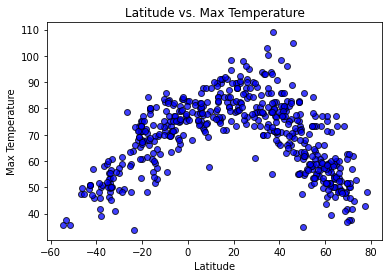

In [15]:
plt.scatter(lat, temp_max, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Latitude vs. Max Temperature")
plt.savefig("Resources/latvstemp.png")
plt.show

In [1]:
#This code is grabbing both Max temperatures and latitude, it gives us an arc scatterplot which would mean that there is a
#relation between latitude and Max Temperature.

## Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(*args, **kw)>

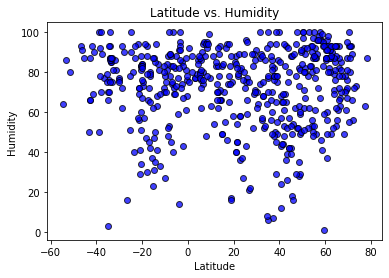

In [16]:
plt.scatter(lat, humidity, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity")
plt.savefig("Resources/latvshum.png")
plt.show

In [ ]:
# This code is grabbing both Humidity and Latitude, the scatterplot doesnt appear to show any relation

## Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(*args, **kw)>

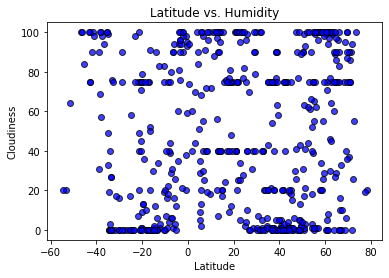

In [17]:
plt.scatter(lat, cloudiness, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Humidity")
plt.savefig("Resources/latvscloud.png")
plt.show

In [ ]:
#This code is grabbing both Cloudiness and Latitude, similar to Humidity, it doesnt appear to show any relation

## Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(*args, **kw)>

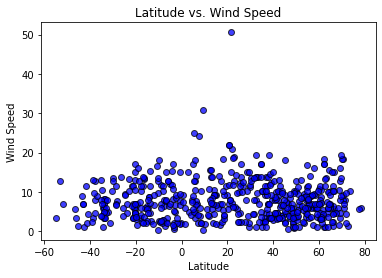

In [18]:
plt.scatter(lat, wind_speed, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed")
plt.savefig("Resources/latvswind.png")
plt.show

In [ ]:
# This code is grabbing both Wind Speed and Latitude, it appears that wind speeds over 20 are highly unlikely in most of the world


## Linear Regression

In [19]:
# OPTIONAL: Create a function to create Linear Regression plots

In [20]:
# Create Northern and Southern Hemisphere DataFrames

northern_df = weather_df[weather_df["Latitude"] >0]
northern_df.head()

,City,Country,Latitude,Longitude,Temperature,Max Temperature,Cloudiness,Humidity,Wind Speed
5,kapaa,US,22.08,-159.32,79.70,80.60,75.0,78.0,20.80
9,birsk,RU,55.42,55.54,64.00,64.00,100.0,92.0,8.14
10,muros,ES,42.78,-9.06,62.87,63.00,75.0,93.0,3.36
11,dikson,RU,73.51,80.55,52.70,52.70,100.0,73.0,10.18
13,svarstad,NO,59.40,9.97,57.78,62.01,29.0,1.0,3.71


In [21]:
southern_df = weather_df[weather_df["Latitude"]<0 ]
southern_df.head()

,City,Country,Latitude,Longitude,Temperature,Max Temperature,Cloudiness,Humidity,Wind Speed
0,sao joao da barra,BR,-21.64,-41.05,68.00,68.00,75.0,94.0,11.41
1,hermanus,ZA,-34.42,19.23,55.47,55.47,0.0,76.0,5.79
2,cape town,ZA,-33.93,18.42,49.98,51.80,0.0,93.0,3.36
7,vaini,TO,-21.20,-175.20,73.40,73.40,20.0,69.0,11.41
8,port elizabeth,ZA,-33.92,25.57,53.60,53.60,3.0,87.0,4.70


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

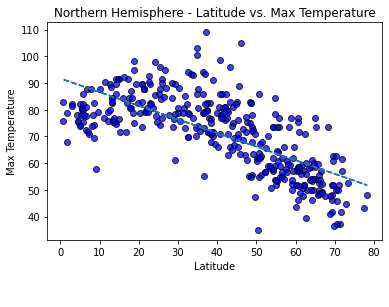

In [22]:
ntl_slope, ntl_int, ntl_r, ntl_p, ntl_std_err = linregress(northern_df["Latitude"], northern_df["Max Temperature"])
ntl_fit = ntl_slope * northern_df["Latitude"] + ntl_int
line_eq_ntl = "y = " + str(round(ntl_slope,2)) + "x + " + str(round(ntl_int,2)) #???
plt.scatter(northern_df["Latitude"],northern_df["Max Temperature"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.annotate(line_eq_ntl,(6,10),fontsize=15,color="red") #???
plt.plot(northern_df["Latitude"],ntl_fit,"--")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Northern Hemisphere - Latitude vs. Max Temperature")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

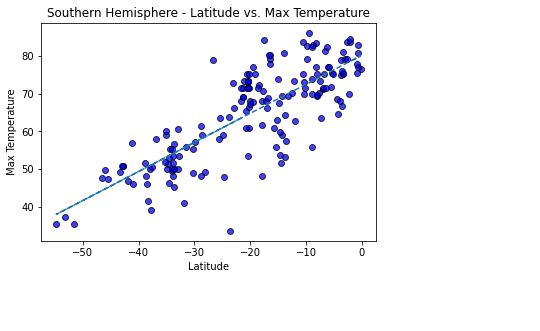

In [23]:
stl_slope, stl_int, stl_r, stl_p, stl_std_err = linregress(southern_df["Latitude"], southern_df["Max Temperature"])
stl_fit = stl_slope * southern_df["Latitude"] + stl_int
line_eq_stl = "y = " + str(round(stl_slope,2)) + "x + " + str(round(stl_int,2)) #???
plt.scatter(southern_df["Latitude"],southern_df["Max Temperature"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.annotate(line_eq_stl,(6,10),fontsize=15,color="red") #???
plt.plot(southern_df["Latitude"],stl_fit,"--")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Southern Hemisphere - Latitude vs. Max Temperature")
plt.show()

In [ ]:
## Northern vs Southern Temperature Linear Regression.
# We can see that temperature decreases as cities are farther from the equator both on the northern and souther hemisphere,
# having higher temperatures closer to the equator which makes sense as both antartica(southern) or Canada(northern) are way
# colder than Mexico

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

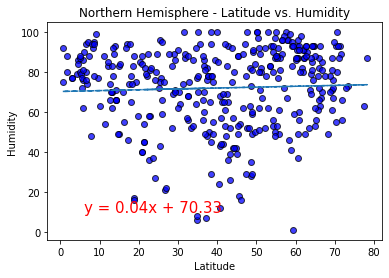

In [24]:
nhl_slope, nhl_int, nhl_r, nhl_p, nhl_std_err = linregress(northern_df["Latitude"], northern_df["Humidity"])
nhl_fit = nhl_slope * northern_df["Latitude"] + nhl_int
line_eq_nhl = "y = " + str(round(nhl_slope,2)) + "x + " + str(round(nhl_int,2))
plt.scatter(northern_df["Latitude"],northern_df["Humidity"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.annotate(line_eq_nhl,(6,10),fontsize=15,color="red")
plt.plot(northern_df["Latitude"],nhl_fit,"--")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere - Latitude vs. Humidity")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

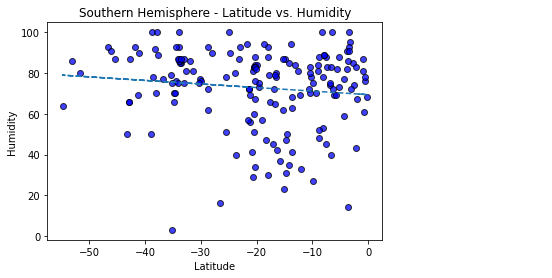

In [25]:
shl_slope, shl_int, shl_r, shl_p, shl_std_err = linregress(southern_df["Latitude"], southern_df["Humidity"])
shl_fit = shl_slope * southern_df["Latitude"] + shl_int
line_eq_shl = "y = " + str(round(shl_slope,2)) + "x + " + str(round(shl_int,2)) #???
plt.scatter(southern_df["Latitude"],southern_df["Humidity"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.annotate(line_eq_shl,(6,10),fontsize=15,color="red") #???
plt.plot(southern_df["Latitude"],shl_fit,"--")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere - Latitude vs. Humidity")
plt.show()

In [ ]:
## Northern vs Southern Hemisphere Humidity
# We dont see any relation between the latitude and its humidity, we can barely see that on the southern hemisphere there is a
# slight increase of humidity as we go farther from the equator. We also see that there are more registers on the northern hemisphere
# this could be due to most 1st world countries being on the northern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

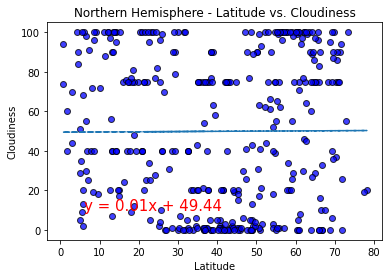

In [26]:
ncl_slope, ncl_int, ncl_r, ncl_p, ncl_std_err = linregress(northern_df["Latitude"], northern_df["Cloudiness"])
ncl_fit = ncl_slope * northern_df["Latitude"] + ncl_int
line_eq_ncl = "y = " + str(round(ncl_slope,2)) + "x + " + str(round(ncl_int,2))
plt.scatter(northern_df["Latitude"],northern_df["Cloudiness"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.annotate(line_eq_ncl,(6,10),fontsize=15,color="red")
plt.plot(northern_df["Latitude"],ncl_fit,"--")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere - Latitude vs. Cloudiness")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

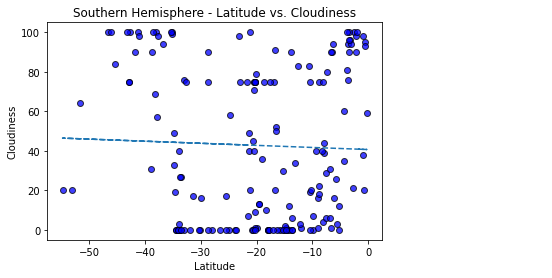

In [27]:
scl_slope, scl_int, scl_r, scl_p, scl_std_err = linregress(southern_df["Latitude"], southern_df["Cloudiness"])
scl_fit = scl_slope * southern_df["Latitude"] + scl_int
line_eq_scl = "y = " + str(round(scl_slope,2)) + "x + " + str(round(scl_int,2)) #???
plt.scatter(southern_df["Latitude"],southern_df["Cloudiness"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.annotate(line_eq_scl,(6,10),fontsize=15,color="red") #???
plt.plot(southern_df["Latitude"],scl_fit,"--")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere - Latitude vs. Cloudiness")
plt.show()

In [ ]:
## Northern vs Southern Hemisphere Cloudiness
# Similarly to Humidity, there doesnt appear to be any relation between latitude and the cloudiness, we can also see that on
# the southern hemisphere there is a slight increase of cloudiness as we go farther from the equator

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

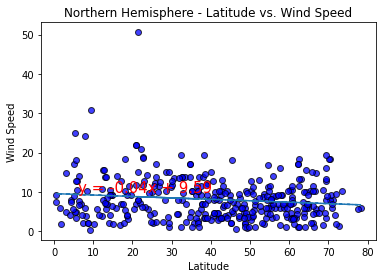

In [28]:
nwl_slope, nwl_int, nwl_r, nwl_p, nwl_std_err = linregress(northern_df["Latitude"], northern_df["Wind Speed"])
nwl_fit = nwl_slope * northern_df["Latitude"] + nwl_int
line_eq_nwl = "y = " + str(round(nwl_slope,2)) + "x + " + str(round(nwl_int,2))
plt.scatter(northern_df["Latitude"],northern_df["Wind Speed"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.annotate(line_eq_nwl,(6,10),fontsize=15,color="red")
plt.plot(northern_df["Latitude"],nwl_fit,"--")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere - Latitude vs. Wind Speed")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

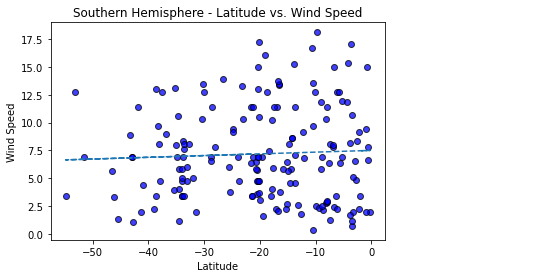

In [29]:
swl_slope, swl_int, swl_r, swl_p, swl_std_err = linregress(southern_df["Latitude"], southern_df["Wind Speed"])
swl_fit = swl_slope * southern_df["Latitude"] + swl_int
line_eq_swl = "y = " + str(round(swl_slope,2)) + "x + " + str(round(swl_int,2)) #???
plt.scatter(southern_df["Latitude"],southern_df["Wind Speed"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.annotate(line_eq_swl,(6,10),fontsize=15,color="red") #???
plt.plot(southern_df["Latitude"],swl_fit,"--")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere - Latitude vs. Wind Speed")
plt.show()

In [ ]:
## Norther vs Southern Hemisphere Wind Speed
# Wind speed barely decreases as we go farther from the equator, it doesnt appear to be significant, still we can also see that
# wind speed is slightly higher on the northern hemisphere.